2.	Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyze the result.

OR Gate Classification Accuracy: 100.00%


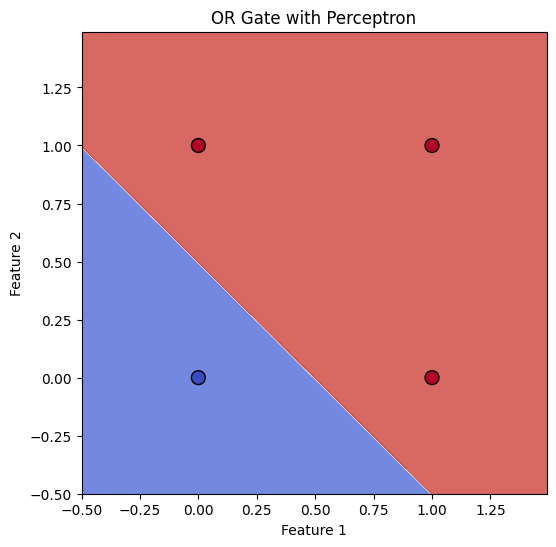

AND Gate Classification Accuracy: 100.00%


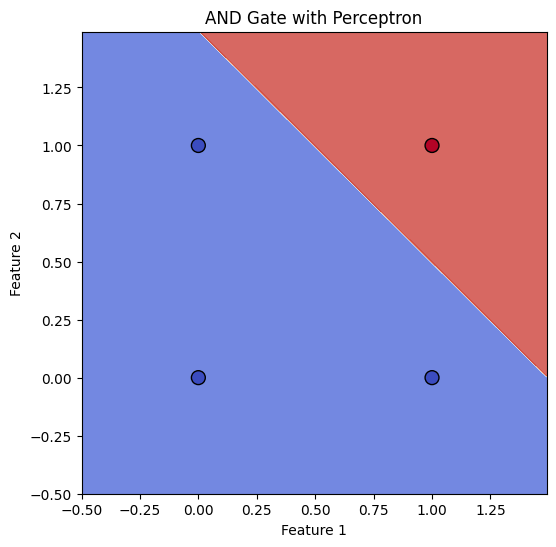

XOR Gate Classification Accuracy: 50.00%


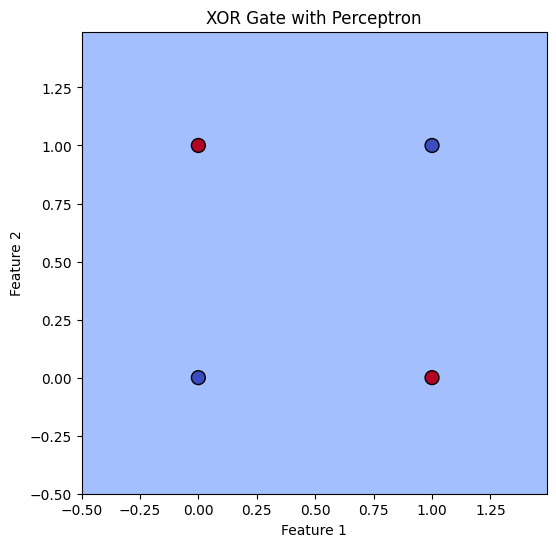

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define OR, AND, and XOR datasets
or_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 1, 1, 1])
}

and_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 0, 0, 1])
}

xor_data = {
    "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    "y": np.array([0, 1, 1, 0])
}

# Function to train and visualize perceptron performance
def analyze_perceptron(data, title):
    X, y = data["X"], data["y"]

    # Train perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X, y)

    # Predict and calculate accuracy
    y_pred = perceptron.predict(X)
    accuracy = accuracy_score(y, y_pred)

    print(f"{title} Classification Accuracy: {accuracy * 100:.2f}%")

    # Visualize decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
    plt.title(f"{title} with Perceptron")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Analyze OR, AND, and XOR datasets
analyze_perceptron(or_data, "OR Gate")
analyze_perceptron(and_data, "AND Gate")
analyze_perceptron(xor_data, "XOR Gate")
